In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchtext.data import get_tokenizer

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
corpus = """ 
Welcome to my thesis presentation; I am eager to present my project today. The structure of my presentation will consist of the following:
A brief introduction, followed by a comprehensive technical view into the background of the algorithms implemented. I will then dive into the methods used in this study. Then, I will proceed with the evaluation metrics, results, and conclusion.
In histopathology, we often need to inspect and classify disease through HE-staining biopsy specimens on small, thin glass slides. This is a reliable method but time-consuming. Whole-slide-imaging in Digital Pathology has helped us digitize this process by creating high-resolution images that can be shared, preprocessed, and further analyzed. Whenever we gather large amounts of data, we can use more data-driven approaches that can help us speed up the process and do more research in the field. The emergence of AI has shown great promise in various computer vision tasks, such as the localization of objects, classification of objects, and segmentation of pixels of interest. As a health informatics student, I am intrigued by how these algorithms work and devoted to contributing beneficial knowledge in this research area.
The central research question guiding this study is: How can we develop and optimize CNN models for tumor localization and segmentation in histopathological images of the thyroid? Here, CNN refers to fully convolutional neural networks; from now on, I will refer to this as CNN. The objectives are To instantiate multiple CNN models derived from the literature and critically assess them using appropriate evaluation metrics.
To understand how a CNN model works, we must first understand its components. An image is represented as a three-dimensional tensor comprised of channel dimensions, height, and width. When working with colored photos, we have three channel dimensions. The tensor numbers represent each channel dimension's pixel intensity: red, blue, and green.
A convolution consists of applying a kernel slides across the input image while computing the dot product of the corresponding numbers from the kernel onto the image and then computing the weighted sums across the image as the output. The hyperparameters in a convolution consist of kernel size, stride length, padding around the image, and dilation rate, which refers to the spacing between pixels used in the calculations to compute the dot product from the numbers in the kernel. The numbers in the kernel are differentiable, meaning we will update them during backpropagation. A convolution is often paired with an activation function. This study uses A rectified linear activation unit, RELU, and a sigmoid activation function. A RELU introduces nonlinearity in the model by transforming all negative values into zeros, where zeros correspond to the background pixels. A sigmoid activation function squashes all of the values in a range between zero and one, which is a way to represent probabilities used in binary classification problems. The first CNN model developed for image segmentation was called the U-net. The U-net consists of an encoder and decoder, aiming to hierarchically retrieve spatial features. We retrieve low-resolution features during the encore, and in the decoder, we retrieve the high-resolution features.
We see that we apply a double convolutional layer paired with ReLU functions, followed by a pooling operation. A pooling operation in this study uses a kernel of size 2x2 and a stride length of two, which returns a condensed version of the input image, with the shapes being reduced by a factor of two, unlike in the convolutional operations. The pooling operation doesn't have any learnable parameters. We see that we apply four pooling operations throughout the encoder. The learned features from the convolutional operations are stored in the channel dimensions. During the decoder, we apply upsampling layers called transposed convolutional layers. These consist of learnable parameters and upsample the input feature map by a factor of two. We use the upsampling layers while concatenating the corresponding feature maps from the encoder to preserve the spatial features learned throughout the network. This is called residual skip connections and helps with the vanishing gradient problem. I will now show an illustration I have made, which will help me explain the attention U-net initially gave to this study. The attention U-net utilizes a soft attention mechanism in the traditional U-net. We start by retrieving the feature maps from the decoder and using them as gating signals. We also retire the feature maps from the encoder. We process these feature maps through a 1x1 convolutional operation paired with a RELU. The outputs are then added. Then that output is then fed to a new 1x1 convolutional operation with a sigmoid activation function. We then modulate the feature maps from the encoder with an element-wise multiplication of the output from the sigmoid activation function. The results are what the authors call attention gates. These attention gates are then appended to every upsampling layer in the decoder and help the model distinguish where to pay more attention to in an image to precisely predict the target. The soft attention mechanism downweighs the gradient coming from background pixels while emphasizing the image's more critical regions.
Furthermore, after the introduction of the paper, attention is All You Need, which introduced the transformer architecture, colleagues from the computer vision department were inspired by the attention mechanism and tried to develop transformer-based models for computer vision. These often tokenize images into patches of size 16x16 and flatten them out to have a sequence of patches as the input. Then, we map the patches to a higher dimensional space using embedding vectors. These embedding vectors consist of differentiable learnable parameters, which we will update during backpropagation. The aim is to find contextual information about the patches. Since transformers are permutation invariant, meaning they do not know the inherent order of the input sequences, the output would remain the same, and even if the input sequence is changed, we have additional encoding. The positional encoding adds another layer of dense vectors to give the model information about the positions of the patches. We then linear project the embedding vectors to a query, key, and value vector. We then compute the scaled dot product, which involves computing a matrix multiplication of the query and key vector transposed, divided by the square root of the dimensions of the embedding vectors. We then take a softmax activation function and compute the dot product with the value vector. The result is a matrix that shows the weighted sums of the attention scores, which tell us the importance of each patch compared to every other patch. That matrix then goes through a feed-forward mechanism consisting of a linear layer, an activation function, often a gel, and then a linear layer at the end.
I have framed my methodological approach against another well-established scientific article with similar objectives to ensure my study follows standard guidelines for writing academic articles. This approach consists of three steps: data acquisition, model instantiation, and evaluation. I collaborated with a research group at the university hospital, SURGIC, which provided me with the dataset used in this study. The dataset consists of 134  ultrasound images of the thyroid and their corresponding masks, meticulously segmented by a student. All of the work has been carried out on one of their computers in the university hospital, and I had a GPU cluster associated with it. In this study, we have instantiated a slightly modified U-net from scratch, an attention U-net from scratch closely following the teachings of the original paper.
Furthermore, we have explored transfer learning by importing two pre-trained models from a well-established library with their corresponding weights. These are called deeplabv3 and unplug. They have been trained on a Microsoft dataset called Everyday Objects in Context, which comprises 20,000 images with 90 different classes.
The evaluation metrics used in this study are intersection over union and dice coefficients; these have been chosen by looking at the literature regarding evaluation metrics for segmentation models. The problems with using traditional binary segmentation metrics stem from having a highly imbalanced dataset, where most pixels correspond to the background pixels. This means that even if a model predicted every pixel in the image to conform to the background, the model would still receive a relatively accurate positive rate even if a tumor wasn't. The intersection over union measures the overlap between the predicted and ground truth pixels, while the dice coefficient measures their similarity. The binary version of the formulas can be seen here and uses true positives, false positives, and false negatives. 
I, at this moment, show the final results of this study. We observe a significant difference between the scores from the attention unit compared to the rest, and it is difficult to pinpoint exactly why the others performed so poorly compared to the attention unit. We have to take the limited data size and complexity of the images into account when presenting the results. We must acknowledge that these can only be seen as preliminary results as the models have yet to be evaluated on a significant enough dataset to represent the population at an adequate level.
To restate the research question and try to answer it to the best of our abilities, the soft attention mechanism introduced in the novel U-net emerged as the winning solution.
As a health informatics student, I am interested in researching the organizational aspects of introducing algorithms like these into medical practice and seeing how much medical practitioners engage with it and how much they trust it. I proposed a novel approach to introduce a trained algorithm into practice, which could help allocate the necessary help to those in urgent need first while not delegating too much power over the algorithms and making us too reliant on the algorithms too early in the process.
"""

In [4]:
tokenizer = get_tokenizer("basic_english")
# tokenizer = spacy.load("en_core_web_sm").tokenizer if you can download it

class CustomDataset(Dataset):
    def __init__(self, corpus, sequence_length, tokenizer):
        self.sequence_length = sequence_length
        self.tokenizer = tokenizer
        self.corpus = corpus
        self.tokenized_corpus = self.tokenize_corpus(corpus)
        self.vocab = self.build_vocab(self.tokenized_corpus)
        self.indexed_corpus = self.convert_to_indices(self.tokenized_corpus)

    def tokenize_corpus(self, corpus):
        return [token for token in self.tokenizer(corpus)]

    def build_vocab(self, tokenized_corpus):
        vocab = {}
        special_tokens = ["<sos>", "<eos>", "<unk>"]
        for token in special_tokens:
            vocab[token] = len(vocab)
        for token in tokenized_corpus:
            if token not in vocab:
                vocab[token] = len(vocab)
        return vocab

    def convert_to_indices(self, tokenized_corpus):
        return [self.vocab.get(token, self.vocab["<unk>"]) for token in tokenized_corpus]

    def __len__(self):
        return max(0, len(self.indexed_corpus) - self.sequence_length)

    def __getitem__(self, idx):
        src = self.indexed_corpus[idx:idx + self.sequence_length]
        trg = self.indexed_corpus[idx + 1:idx + self.sequence_length + 1]
        return torch.tensor(src), torch.tensor(trg)

sequence_length = 30
batch_size = 64
num_epochs = 10

dataset = CustomDataset(corpus, sequence_length, tokenizer)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [18]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size, dropout=0.0):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # input of size (batch, time-step, channels)
        # output of size (batch, time-step, head size)
        B,T,C = x.shape
        k = self.key(x)   # (B,T,hs)
        q = self.query(x) # (B,T,hs)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5 # (B, T, hs) @ (B, hs, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,hs)
        out = wei @ v # (B, T, T) @ (B, T, hs) -> (B, T, hs)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size, dropout=0.0):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd, dropout=0.0):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class GPTLanguageModel(nn.Module):

    def __init__(self, vocab_size, n_embd, block_size, n_layer, n_head):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

        # better init, not covered in the original GPT video, but important, will cover in followup video
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [26]:
def train(model, dataloader, optimizer, criterion, device, num_epochs):
    train_losses = []
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for input_seq, target_seq in tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            input_seq, target_seq = input_seq.to(device), target_seq.to(device)
            optimizer.zero_grad()
            logits, loss = model(input_seq, target_seq)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        average_loss = total_loss / len(dataloader)
        train_losses.append(average_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}")
        
    plt.plot(np.arange(num_epochs)+1, train_losses)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Training loss over epochs')
    plt.show()
    
    torch.save(model.state_dict(), 'best_model.pth')
    return model


In [14]:
def generate_text(model, tokenizer, vocab, input_text, max_length, device):
    model.eval()
    with torch.no_grad():
        tokenized_text = tokenizer(input_text)
        indexed_text = [vocab.get(token, vocab['<unk>']) for token in tokenized_text]
        input_seq = torch.tensor(indexed_text, dtype=torch.long, device=device).unsqueeze(0)
        generated_indices = model.generate(input_seq, max_length)
        generated_tokens = [list(vocab.keys())[idx] for idx in generated_indices.squeeze().tolist()]
        generated_text = ' '.join(generated_tokens)
    return generated_text


In [19]:
vocab_size = len(dataset.vocab)
n_embd = 512  # You can adjust this value according to your requirements
block_size = sequence_length 
n_layer = 8
n_head = 5
model = GPTLanguageModel(vocab_size, n_embd, block_size, n_layer, n_head).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

Epoch 1/100: 100%|██████████| 28/28 [00:03<00:00,  9.28it/s]


Epoch [1/100], Loss: 0.1206


Epoch 2/100: 100%|██████████| 28/28 [00:02<00:00,  9.58it/s]


Epoch [2/100], Loss: 0.1160


Epoch 3/100: 100%|██████████| 28/28 [00:02<00:00,  9.50it/s]


Epoch [3/100], Loss: 0.1110


Epoch 4/100: 100%|██████████| 28/28 [00:02<00:00,  9.48it/s]


Epoch [4/100], Loss: 0.1090


Epoch 5/100: 100%|██████████| 28/28 [00:02<00:00,  9.43it/s]


Epoch [5/100], Loss: 0.1075


Epoch 6/100: 100%|██████████| 28/28 [00:02<00:00,  9.37it/s]


Epoch [6/100], Loss: 0.1047


Epoch 7/100: 100%|██████████| 28/28 [00:02<00:00,  9.34it/s]


Epoch [7/100], Loss: 0.1085


Epoch 8/100: 100%|██████████| 28/28 [00:03<00:00,  9.29it/s]


Epoch [8/100], Loss: 0.1141


Epoch 9/100: 100%|██████████| 28/28 [00:03<00:00,  9.28it/s]


Epoch [9/100], Loss: 0.1070


Epoch 10/100: 100%|██████████| 28/28 [00:03<00:00,  9.24it/s]


Epoch [10/100], Loss: 0.1053


Epoch 11/100: 100%|██████████| 28/28 [00:03<00:00,  9.18it/s]


Epoch [11/100], Loss: 0.1081


Epoch 12/100: 100%|██████████| 28/28 [00:03<00:00,  9.14it/s]


Epoch [12/100], Loss: 0.1115


Epoch 13/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [13/100], Loss: 0.1119


Epoch 14/100: 100%|██████████| 28/28 [00:03<00:00,  9.11it/s]


Epoch [14/100], Loss: 0.1102


Epoch 15/100: 100%|██████████| 28/28 [00:03<00:00,  9.11it/s]


Epoch [15/100], Loss: 0.1070


Epoch 16/100: 100%|██████████| 28/28 [00:03<00:00,  9.08it/s]


Epoch [16/100], Loss: 0.1029


Epoch 17/100: 100%|██████████| 28/28 [00:03<00:00,  9.04it/s]


Epoch [17/100], Loss: 0.0986


Epoch 18/100: 100%|██████████| 28/28 [00:03<00:00,  9.01it/s]


Epoch [18/100], Loss: 0.0975


Epoch 19/100: 100%|██████████| 28/28 [00:03<00:00,  9.00it/s]


Epoch [19/100], Loss: 0.0967


Epoch 20/100: 100%|██████████| 28/28 [00:03<00:00,  8.96it/s]


Epoch [20/100], Loss: 0.0959


Epoch 21/100: 100%|██████████| 28/28 [00:03<00:00,  8.92it/s]


Epoch [21/100], Loss: 0.0941


Epoch 22/100: 100%|██████████| 28/28 [00:03<00:00,  8.85it/s]


Epoch [22/100], Loss: 0.0953


Epoch 23/100: 100%|██████████| 28/28 [00:03<00:00,  8.86it/s]


Epoch [23/100], Loss: 0.0952


Epoch 24/100: 100%|██████████| 28/28 [00:03<00:00,  8.92it/s]


Epoch [24/100], Loss: 0.0942


Epoch 25/100: 100%|██████████| 28/28 [00:03<00:00,  9.00it/s]


Epoch [25/100], Loss: 0.0926


Epoch 26/100: 100%|██████████| 28/28 [00:03<00:00,  9.06it/s]


Epoch [26/100], Loss: 0.0928


Epoch 27/100: 100%|██████████| 28/28 [00:03<00:00,  9.10it/s]


Epoch [27/100], Loss: 0.0923


Epoch 28/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [28/100], Loss: 0.0908


Epoch 29/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [29/100], Loss: 0.0907


Epoch 30/100: 100%|██████████| 28/28 [00:03<00:00,  9.15it/s]


Epoch [30/100], Loss: 0.0896


Epoch 31/100: 100%|██████████| 28/28 [00:03<00:00,  9.14it/s]


Epoch [31/100], Loss: 0.0903


Epoch 32/100: 100%|██████████| 28/28 [00:03<00:00,  9.17it/s]


Epoch [32/100], Loss: 0.0899


Epoch 33/100: 100%|██████████| 28/28 [00:03<00:00,  9.17it/s]


Epoch [33/100], Loss: 0.0897


Epoch 34/100: 100%|██████████| 28/28 [00:03<00:00,  9.16it/s]


Epoch [34/100], Loss: 0.0901


Epoch 35/100: 100%|██████████| 28/28 [00:03<00:00,  9.20it/s]


Epoch [35/100], Loss: 0.0911


Epoch 36/100: 100%|██████████| 28/28 [00:03<00:00,  9.18it/s]


Epoch [36/100], Loss: 0.0888


Epoch 37/100: 100%|██████████| 28/28 [00:03<00:00,  9.18it/s]


Epoch [37/100], Loss: 0.0888


Epoch 38/100: 100%|██████████| 28/28 [00:03<00:00,  9.17it/s]


Epoch [38/100], Loss: 0.0906


Epoch 39/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [39/100], Loss: 0.1006


Epoch 40/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [40/100], Loss: 0.1083


Epoch 41/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [41/100], Loss: 0.1218


Epoch 42/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [42/100], Loss: 0.1321


Epoch 43/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [43/100], Loss: 0.1264


Epoch 44/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [44/100], Loss: 0.1160


Epoch 45/100: 100%|██████████| 28/28 [00:03<00:00,  9.09it/s]


Epoch [45/100], Loss: 0.1075


Epoch 46/100: 100%|██████████| 28/28 [00:03<00:00,  9.09it/s]


Epoch [46/100], Loss: 0.1015


Epoch 47/100: 100%|██████████| 28/28 [00:03<00:00,  9.11it/s]


Epoch [47/100], Loss: 0.0991


Epoch 48/100: 100%|██████████| 28/28 [00:03<00:00,  9.10it/s]


Epoch [48/100], Loss: 0.0966


Epoch 49/100: 100%|██████████| 28/28 [00:03<00:00,  9.10it/s]


Epoch [49/100], Loss: 0.0961


Epoch 50/100: 100%|██████████| 28/28 [00:03<00:00,  9.10it/s]


Epoch [50/100], Loss: 0.0983


Epoch 51/100: 100%|██████████| 28/28 [00:03<00:00,  9.10it/s]


Epoch [51/100], Loss: 0.0968


Epoch 52/100: 100%|██████████| 28/28 [00:03<00:00,  9.10it/s]


Epoch [52/100], Loss: 0.0962


Epoch 53/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [53/100], Loss: 0.0927


Epoch 54/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [54/100], Loss: 0.0933


Epoch 55/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [55/100], Loss: 0.0911


Epoch 56/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [56/100], Loss: 0.0916


Epoch 57/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [57/100], Loss: 0.0902


Epoch 58/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [58/100], Loss: 0.0905


Epoch 59/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [59/100], Loss: 0.0956


Epoch 60/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [60/100], Loss: 0.1014


Epoch 61/100: 100%|██████████| 28/28 [00:03<00:00,  9.14it/s]


Epoch [61/100], Loss: 0.0975


Epoch 62/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [62/100], Loss: 0.0956


Epoch 63/100: 100%|██████████| 28/28 [00:03<00:00,  9.15it/s]


Epoch [63/100], Loss: 0.0925


Epoch 64/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [64/100], Loss: 0.0898


Epoch 65/100: 100%|██████████| 28/28 [00:03<00:00,  9.16it/s]


Epoch [65/100], Loss: 0.0896


Epoch 66/100: 100%|██████████| 28/28 [00:03<00:00,  9.15it/s]


Epoch [66/100], Loss: 0.0882


Epoch 67/100: 100%|██████████| 28/28 [00:03<00:00,  9.15it/s]


Epoch [67/100], Loss: 0.0887


Epoch 68/100: 100%|██████████| 28/28 [00:03<00:00,  9.09it/s]


Epoch [68/100], Loss: 0.0878


Epoch 69/100: 100%|██████████| 28/28 [00:03<00:00,  9.14it/s]


Epoch [69/100], Loss: 0.0880


Epoch 70/100: 100%|██████████| 28/28 [00:03<00:00,  9.16it/s]


Epoch [70/100], Loss: 0.0882


Epoch 71/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [71/100], Loss: 0.0871


Epoch 72/100: 100%|██████████| 28/28 [00:03<00:00,  9.14it/s]


Epoch [72/100], Loss: 0.0867


Epoch 73/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [73/100], Loss: 0.0858


Epoch 74/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [74/100], Loss: 0.0853


Epoch 75/100: 100%|██████████| 28/28 [00:03<00:00,  9.14it/s]


Epoch [75/100], Loss: 0.0856


Epoch 76/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [76/100], Loss: 0.0850


Epoch 77/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [77/100], Loss: 0.0843


Epoch 78/100: 100%|██████████| 28/28 [00:03<00:00,  9.09it/s]


Epoch [78/100], Loss: 0.0841


Epoch 79/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [79/100], Loss: 0.0841


Epoch 80/100: 100%|██████████| 28/28 [00:03<00:00,  9.11it/s]


Epoch [80/100], Loss: 0.0833


Epoch 81/100: 100%|██████████| 28/28 [00:03<00:00,  9.11it/s]


Epoch [81/100], Loss: 0.0838


Epoch 82/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [82/100], Loss: 0.0828


Epoch 83/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [83/100], Loss: 0.0825


Epoch 84/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [84/100], Loss: 0.0826


Epoch 85/100: 100%|██████████| 28/28 [00:03<00:00,  9.14it/s]


Epoch [85/100], Loss: 0.0820


Epoch 86/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [86/100], Loss: 0.0824


Epoch 87/100: 100%|██████████| 28/28 [00:03<00:00,  9.14it/s]


Epoch [87/100], Loss: 0.0819


Epoch 88/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [88/100], Loss: 0.0817


Epoch 89/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [89/100], Loss: 0.0818


Epoch 90/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [90/100], Loss: 0.0819


Epoch 91/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [91/100], Loss: 0.0820


Epoch 92/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [92/100], Loss: 0.0817


Epoch 93/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [93/100], Loss: 0.0814


Epoch 94/100: 100%|██████████| 28/28 [00:03<00:00,  9.12it/s]


Epoch [94/100], Loss: 0.0813


Epoch 95/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [95/100], Loss: 0.0819


Epoch 96/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [96/100], Loss: 0.0942


Epoch 97/100: 100%|██████████| 28/28 [00:03<00:00,  9.16it/s]


Epoch [97/100], Loss: 0.1406


Epoch 98/100: 100%|██████████| 28/28 [00:03<00:00,  9.13it/s]


Epoch [98/100], Loss: 0.1761


Epoch 99/100: 100%|██████████| 28/28 [00:03<00:00,  9.14it/s]


Epoch [99/100], Loss: 0.1787


Epoch 100/100: 100%|██████████| 28/28 [00:03<00:00,  9.18it/s]


Epoch [100/100], Loss: 0.1539


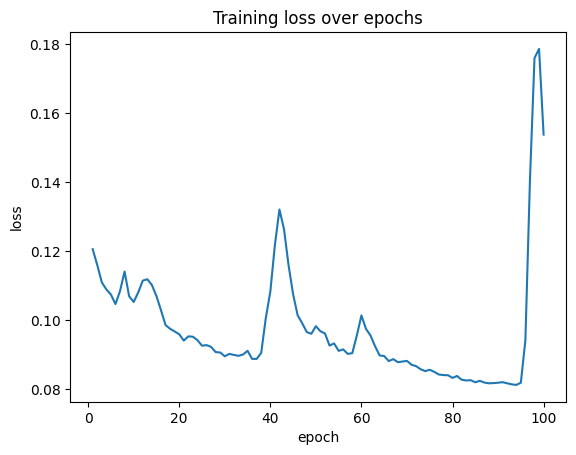

In [29]:
num_epochs = 100
trained_model = train(model, dataloader, optimizer, criterion, device, num_epochs)

In [32]:
input_text = "attention"  # Replace with your input text
max_length = 50  # Maximum length of the generated text
generated_text = generate_text(trained_model, tokenizer, dataset.vocab, input_text, max_length, device)
print("Generated Text:", generated_text)

Generated Text: attention is all you need , which introduced the transformer architecture , colleagues from the computer vision department were inspired by the attention mechanism and tried to develop transformer-based models for computer vision . these often tokenize images into patches of size 16x16 and flatten them out to have a sequence
